Implementing Cyclic Coordinate Descent

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from matplotlib import pyplot as plt

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1)

In [2]:
# This is the single variable optimization problem
def soft_threshold(rho,lamda):
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0

# The goal here is to cycle through all our predictor weights, holding all but one constant and find the minimum for
# that one
def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0))
    
    # The first loo goes through the number of iterations we set
    for i in range(num_iters): 
        
        # The second loop goes through each predictor (X1 - Xj)
        for j in range(n):
           
            X_j = X[:,j].reshape(-1,1) # We set Xj equal to our predictor we are currently looping through 
            y_pred = X @ theta # Our prediction for y is a declarator of our predictor X & theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j) # Rho thus becomes a declarator of our transposed 
                                                       # predictor matrix and the residual function
        
            # Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

(0.06309573444801933, 1584.893192461114, -849.8147108555953, 820.6104516733536)

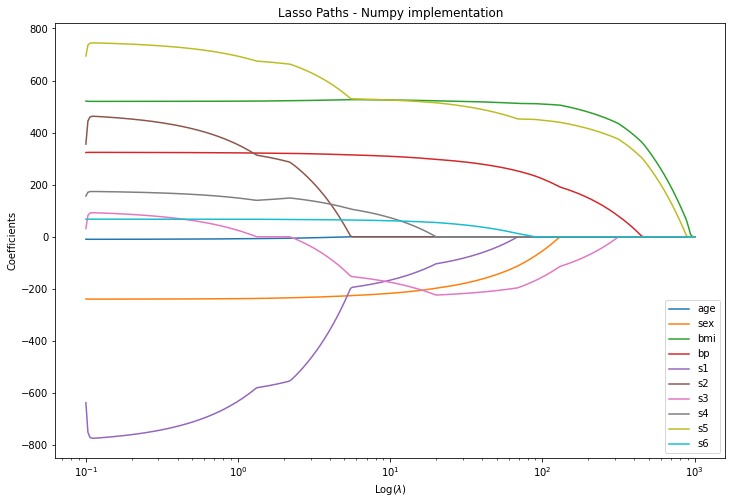

In [3]:
# Initialize variables
# We need the shape of our predictor matrix for our corresponding theta matrix which we will call for our coordinate
# descent to subsequently fix and vary specific predictor weights 
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()

# Range of lambda values
# These are the starting values we will use to loop through for our descent algorithm
lamda = np.logspace(0,4,300)/10

# Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

# Stack into numpy array
theta_lasso = np.stack(theta_list).T

# Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

(6.545782818637954e-05,
 3.524476239294173,
 -861.120524805656,
 825.1469480793228)

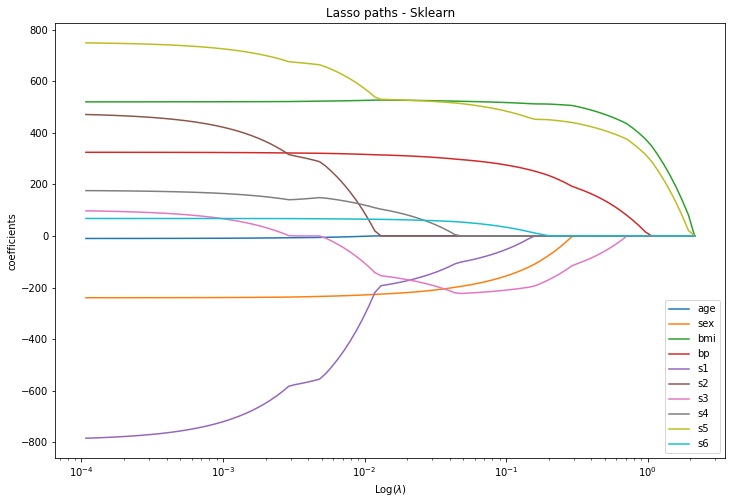

In [12]:
# We load the dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# After the email this step made much more sense
X / np.linalg.norm(X,axis=0)  # Just as before we need to standardize our data if we want to match as closely as 
                              # possible 
m,n = X.shape

eps = 5e-5  # We make it small so that the path is as long as possible

# Implement lasso with coordinate descent
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(X, y, eps, fit_intercept=False)

# Plotting the results
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

By the end of our coordinate descent the two models have converged, our model at 820 & the sklearn model at 825

Citations: "Lasso regression: implementation of coordinate descent" by Xavier Bourret Sicotte https://xavierbourretsicotte.github.io/lasso_implementation.html